# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

To compute this integral I used a method known as Monte Carlo integration or importance sampling. Points are sampled from a given probability distribution $p(x)$. This distribution is chosen such that it resembles the shape of the integrand function $f(x)$, making the sampling more efficient. Instead of simply accepting or rejecting points, each sampled point $x_i$ contributes to the integral with a weight determined by the ratio $\frac{f(x_i)}{p(x_i)}$. Then the integral $I$ can be approximated as:
$$I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)}$$
where $x_i$ are sampled from the probability distribution $p(x)$, and $N$ is the total number of sampled points.
Importance sampling increases efficiency by reducing variance. When $p(x)$ is close to the shape of $f(x)$, the samples $x_i$ are more likely to be in regions where $f(x)$ has significant values.

This is why the second approach should be better than the first one:
- sampling a uniform distribution we don't exploit the intrinsic benifits of the importance sampling...
  $$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{1} \cdot 1 \cdot \, d x = 1$$
  with variance
  $$\sigma_I = \int_0^1 \biggl( \frac{\frac{\pi}{2}\cos(\pi x/2)}{1} \biggr)^2 \cdot 1 \cdot \, d x - I^2 = \frac{\pi^2}{8} - 1=0.2337$$
- sampling a slightly similar probability distribution such as $p(x)=2(1-x)$ the situation is already improved by a factor $10$!
  $$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{2(1-x)} 2(1-x) \, d x = 1$$
  with variance
  $$\sigma_I = \int_0^1 \biggl( \frac{\frac{\pi}{2}\cos(\pi x/2)}{2(1-x)} \biggr)^2 2(1-x) \, d x - I^2 = 1.01674 - 1=0.01674$$

In both cases I chose $M=100000$ and $N=100$.

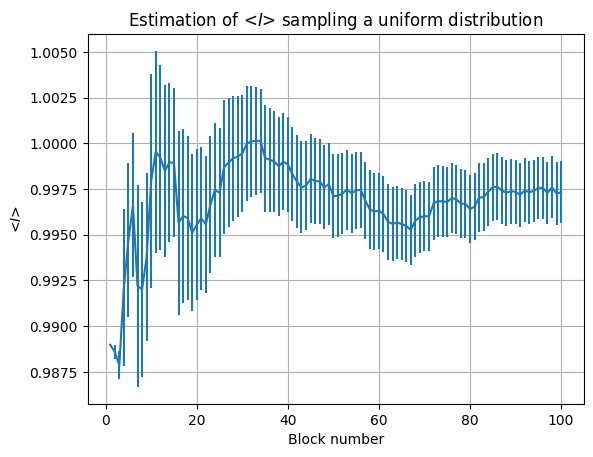

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Risultati1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Block number')
plt.ylabel('<$I$>')
plt.title('Estimation of <$I$> sampling a uniform distribution')
plt.grid(True)
plt.show()

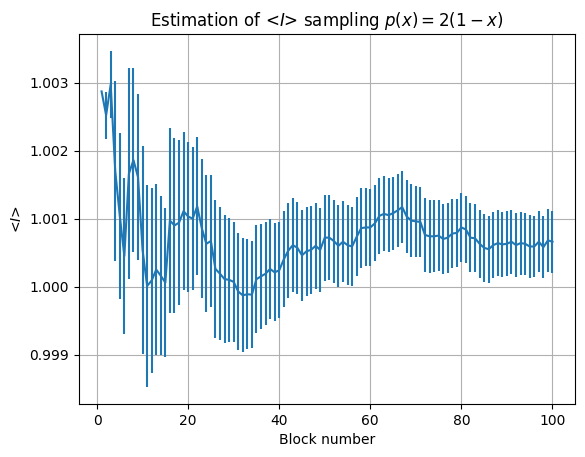

In [3]:
x, f, error = np.loadtxt("Risultati2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Block number')
plt.ylabel('<$I$>')
plt.title('Estimation of <$I$> sampling $p(x)=2(1-x)$')
plt.grid(True)
plt.show()

Another observation is in order. The choice of $p(x)=2(1-x)$ is not at all accidental. I chose this simple function because I was able to invert the cumulative function and thus extract random numbers from such a distribution.

$$F(x) = \int_0^x 2(1-x) \, dx=-x^2+2x$$
$$y=-x^2+2x \rightarrow x=1 \pm \sqrt{1-y}$$

Choosing a more complicated function would have led to a different approach (such as an accept-reject method).

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Optimal parameter (k): 0.9988162292272613
Parameter uncertainty: [0.00038535]


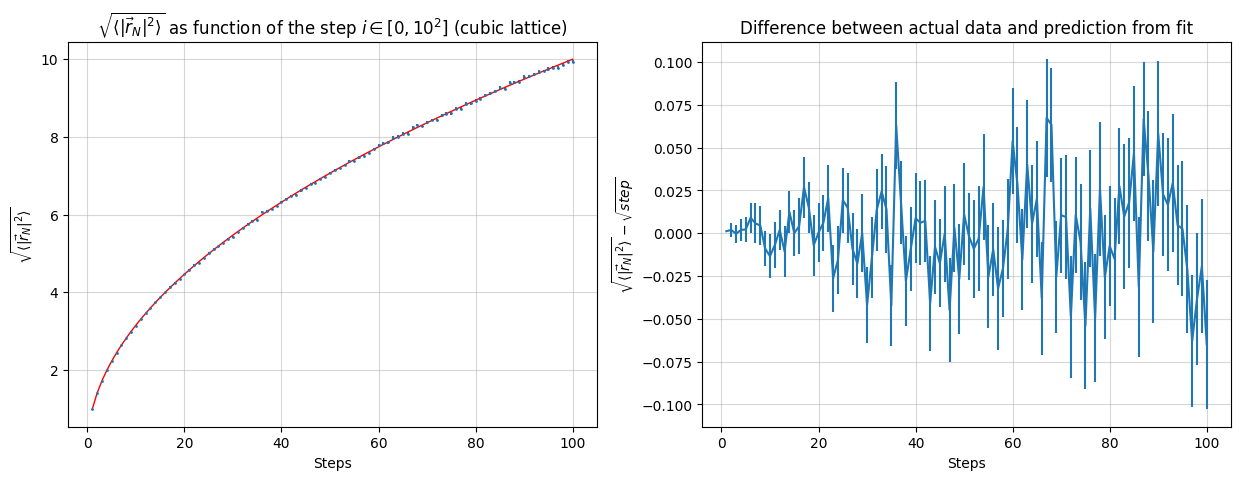

In [16]:
import scipy
from scipy.optimize import curve_fit

# Fitting function: f(x) = k * sqrt(x)
def f(x, k):
    return k * np.sqrt(x)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Load data
x, y, error = np.loadtxt("Risultati4.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

# Fit
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x, p_opt[0])  # Compute the fitted values

# First subplot: error bar plot for simulated data and the fitted function
ax1.errorbar(x, y, yerr=error, fmt='o', markersize=1)
ax1.plot(x, y_fit, color='red', linewidth=1)
ax1.set_xlabel('Steps')
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$')
ax1.set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$' ' as function of the step ' r'$i\in [0,10^2]$' ' (cubic lattice)')
ax1.grid(True, alpha=0.5)

# error bar
ax2.errorbar(x, y - y_fit, yerr=error)
ax2.set_xlabel('Steps')
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle} - \sqrt{step}$')
ax2.set_title('Difference between actual data and prediction from fit')
ax2.grid(True, alpha=0.5)

# Print the optimal parameter and its uncertainty
print("Optimal parameter (k):", p_opt[0])
print("Parameter uncertainty:", np.sqrt(np.diag(p_cov)))

plt.show()

Optimal parameter (k): 0.9982998489595689
Parameter uncertainty: [0.00040917]


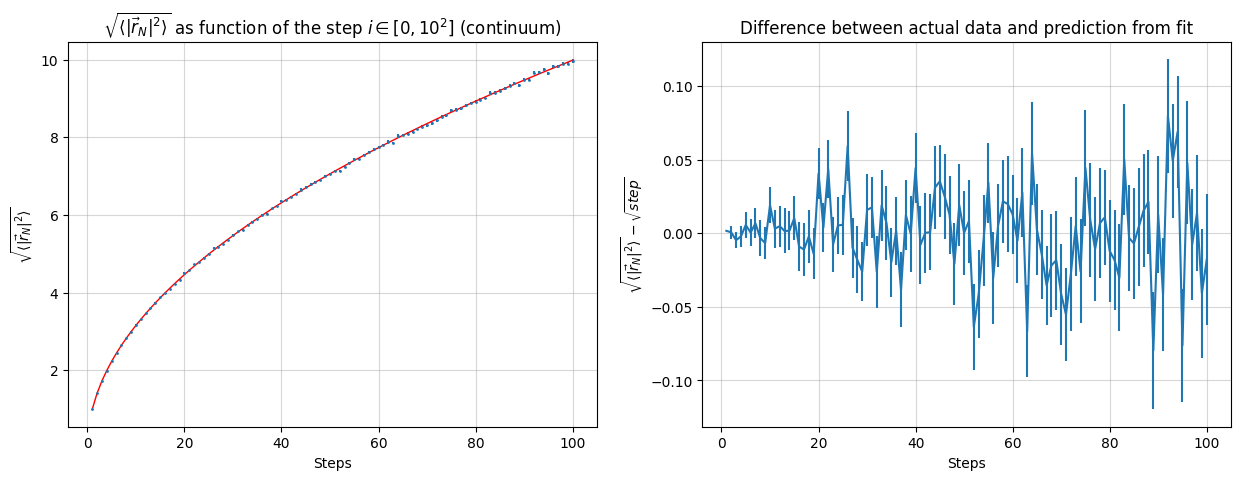

In [18]:
import scipy
from scipy.optimize import curve_fit

# Fitting function: f(x) = k * sqrt(x)
def f(x, k):
    return k * np.sqrt(x)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Load data
x, y, error = np.loadtxt("Risultati6.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

# Fit
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x, p_opt[0])  # Compute the fitted values

# First subplot: error bar plot for simulated data and the fitted function
ax1.errorbar(x, y, yerr=error, fmt='o', markersize=1)
ax1.plot(x, y_fit, color='red', linewidth=1)
ax1.set_xlabel('Steps')
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$')
ax1.set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$' ' as function of the step ' r'$i\in [0,10^2]$' ' (continuum)')
ax1.grid(True, alpha=0.5)

# error bar
ax2.errorbar(x, y - y_fit, yerr=error)
ax2.set_xlabel('Steps')
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle} - \sqrt{step}$')
ax2.set_title('Difference between actual data and prediction from fit')
ax2.grid(True, alpha=0.5)

# Print the optimal parameter and its uncertainty
print("Optimal parameter (k):", p_opt[0])
print("Parameter uncertainty:", np.sqrt(np.diag(p_cov)))

plt.show()

In these graphs, I present plots of $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ for 3D random walks on a cubic lattice and in the continuum as a function of the step $i \in [0,10^2]$. For each fixed step $n$, I simulated $M=10000$ 3D random walks, each moving randomly for exactly $n$ steps. To analyze this, I divided the $M$ simulations into $N=100$ blocks, each containing $L=M/N$ steps. This approach enabled me to compute averages with their corresponding statistical uncertainties.

An interesting observation arises here. There was deliberation regarding where to apply the square root in the code. Ultimately, I accumulated the square of the modulus of the distance over each block and then took the square root after averaging over the number of steps per block. Consequently, in the context of data blocking, the measure is represented by $\sqrt{\langle |\vec{r}_N|^2 \rangle}$, as one would expected.

Another noteworthy decision was whether to restart the walk after each fixed step $i$. I chose not to save the position of the random walker after each cycle to minimize correlation with previous attempts, aiming to maintain the Markov chain property.

Lastly, regarding the note on "sampling uniformly the solid angle": to extract $\phi$ in $[0,2\pi]$ is straightforward, but for $\theta$ in $[0,\pi]$, a direct extraction would not be uniform. The hemispheres of the mapped sphere would be denser in the "north-south" direction compared to the "west-east" direction. To handle this, I needed to respect the Jacobian of spherical coordinates. Uniform distribution over the solid angle requires that the probability of finding a point within a certain interval of $\theta$ and $\phi$ is uniform over the entire surface of the sphere ($\, dA = \sin(\theta) \, d\theta \, d\phi$). Therefore, I computed the cumulative distribution function (CDF) for $\theta$: $F(\theta) = \int_0^\theta \frac{1}{2} \sin(t) \, dt =\frac{1}{2}( 1 - \cos(\theta))$. Inverting this CDF gives $\theta = \arccos(1 - 2u)$, where $u$ is a uniform random variable between 0 and 1. This ensures that $\theta$ is distributed such that the probability is proportional to $\sin(\theta)$, necessary for achieving a uniform distribution over the solid angle in spherical coordinates. As mentioned, for the azimuthal angle $\phi$, uniform extraction from $[0,2\pi]$ is sufficient.

At last, it is comforting to note that the fit demonstrates a perfect agreement between random walks and the diffusive process.